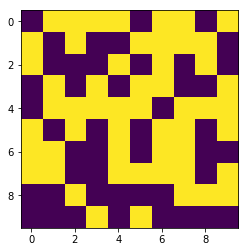

In [ ]:
%matplotlib inline
import numpy as np
import pylab as plt

def iterated_conditional_modes( unaries , beta , labels = None ):
    
    def phiP(v1, v2):
        if v1 == v2:
            return 0
        else:
            return .5
    
    shape = unaries.shape[0:2]
    n_labels = unaries.shape[2]
    if labels is None:
        labels = numpy.argmin ( unaries , axis =2)
        originalLabel = labels
        plt.imshow(labels)
        plt.show()
        continue_search = True
        maxLoop = 1000000
        loopIndex = 0
    while ( continue_search):
        loopIndex += 1
        continue_search = False
        for x0 in range (1, shape[0] -1):
            for x1 in range (1, shape[1] -1):
                current_label = labels[x0 , x1]
                min_energy = float('inf')
                best_label = None
                for l in range ( n_labels ):
                    # evaluate cost
                    energy = 0.0
                    # unary terms
                    energy += unaries[x0,x1,l]
                    # pairwise terms
                    energy += phiP(labels[x0,x1], labels[x0 - 1, x1])
                    energy += phiP(labels[x0,x1], labels[x0 + 1, x1])
                    energy += phiP(labels[x0,x1], labels[x0, x1 - 1])
                    energy += phiP(labels[x0,x1], labels[x0, x1 + 1])
                    if energy < min_energy :
                        min_energy = energy
                        best_label = l
                    if best_label != current_label :
                        labels[x0 , x1] = best_label
                        continue_search = True
                    if loopIndex >= maxLoop:
                        continue_search = False
    return labels, originalLabel

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    shape = [10 , 10]
    n_labels = 2
    # unaries
    unaries = numpy.random.rand( shape[0] , shape[1] , n_labels )
    # regularizer strength
    beta = 0.01
    labels, originalLabel = iterated_conditional_modes(unaries, beta = beta )
    plt.imshow(labels)
    plt.show()
    
    plt.imshow(abs(labels - originalLabel))
    plt.show()

In [25]:
abs(-5)

5